# **Create a Map to Visualize Weather Data**

In [1]:
import os
import pathlib
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import geopandas as gpd
import contextily as ctx

from skimage import io
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [2]:
src_dir = pathlib.Path.cwd().parent
data_dir = src_dir / 'data'

df = pd.read_parquet(data_dir / "api_data.parquet")
geo_dataframe = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs=4326)

In [3]:
geo_dataframe

,city,country,latitude,longitude,temp,description,icon,sunset_utc,sunset_local,geometry
0,Kyiv,Ukraine,50.450034,30.524136,27.71,clear sky,01d,2025-07-04 01:12:02,2025-07-04 04:12:02,POINT (30.52414 50.45003)
1,Warsaw,Poland,52.231958,21.006725,33.24,clear sky,01d,2025-07-04 01:59:40,2025-07-04 03:59:40,POINT (21.00672 52.23196)
2,Berlin,Germany,52.510885,13.398937,21.82,overcast clouds,04d,2025-07-04 02:31:41,2025-07-04 04:31:41,POINT (13.39894 52.51088)
3,London,UK,51.507446,-0.127765,20.43,clear sky,01d,2025-07-04 03:20:10,2025-07-04 04:20:10,POINT (-0.12777 51.50745)
4,Madrid,Spain,40.416705,-3.703582,30.59,clear sky,01d,2025-07-04 02:48:31,2025-07-04 04:48:31,POINT (-3.70358 40.4167)
5,Paris,France,48.858890,2.320041,21.57,clear sky,01d,2025-07-04 02:57:03,2025-07-04 04:57:03,POINT (2.32004 48.85889)
6,Rome,Italy,41.893320,12.482932,32.77,few clouds,02d,2025-07-04 01:48:41,2025-07-04 03:48:41,POINT (12.48293 41.89332)
7,Prague,Czechia,50.087465,14.421254,27.73,scattered clouds,03d,2025-07-04 02:14:36,2025-07-04 04:14:36,POINT (14.42125 50.08747)
8,Istanbul,Turkey,41.006381,28.975872,27.32,clear sky,01d,2025-07-04 00:39:45,2025-07-04 03:39:45,POINT (28.97587 41.00638)
9,Stockholm,Sweden,59.325117,18.071093,15.98,overcast clouds,04d,2025-07-04 03:04:19,2025-07-04 05:04:19,POINT (18.07109 59.32512)


In [4]:
def add_icon(row):
    img = io.imread(f"https://openweathermap.org/img/wn/{row.icon}@2x.png")
    img_offset = OffsetImage(img, zoom=0.4, alpha=1, )

    ab = AnnotationBbox(img_offset,[
        row.geometry.x+150000, 
        row.geometry.y-110000
    ], frameon=False)

def GeoAXIS_PLOT(geo_dataframe: gpd.GeoDataFrame):
    ax = geo_dataframe.to_crs(epsg=3857).plot(figsize=(15, 8), color="black")

    geo_dataframe.to_crs(epsg=3857).apply(add_icon, axis=1)

    geo_dataframe.to_crs(epsg=3857).apply(lambda x: ax.annotate(text=f"{x.city}  ", 
                                                  fontsize=10, color="black", 
                                                  xy=x.geometry.centroid.coords[0], 
                                                  ha='right'), axis=1);

    geo_dataframe.to_crs(epsg=3857).apply(lambda x: ax.annotate(text=f" {round(x.temp)}°", 
                                                  fontsize=15, 
                                                  color="black", 
                                                  xy=x.geometry.centroid.coords[0], 
                                                  ha='left'), axis=1);

    xmin, ymin, xmax, ymax = geo_dataframe.to_crs(epsg=3857).total_bounds
    margin_y = .2
    margin_x = .2
    y_margin = (ymax - ymin) * margin_y
    x_margin = (xmax - xmin) * margin_x

    ax.set_xlim(xmin - x_margin, xmax + x_margin)
    ax.set_ylim(ymin - y_margin, ymax + y_margin)

    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

    ax.set_axis_off()

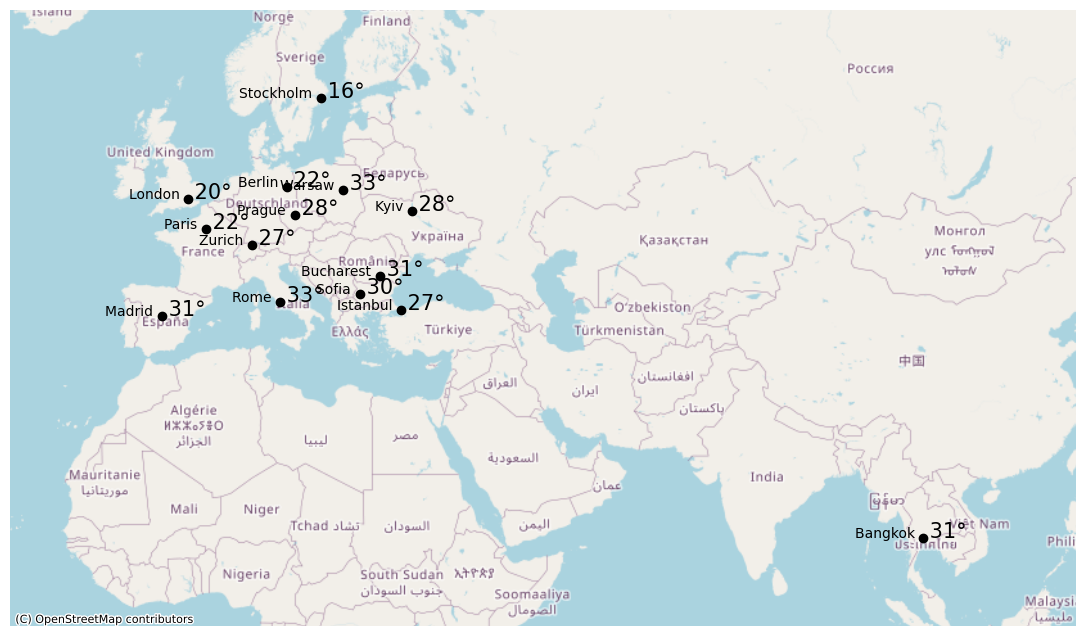

In [6]:
GeoAXIS_PLOT(geo_dataframe=geo_dataframe)